In [1]:
from warnings import filterwarnings

filterwarnings('ignore')

import numpy as np
import pandas as pd

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose
from modules.data_fetcher import download_historical_data

In [8]:
SYMBOL= 'BTC-USDT'

df = download_historical_data(SYMBOL,'1hour').iloc[-1000:]
df["Return"] = df.Close.pct_change()
df.dropna(inplace=True)
print(df.shape)
df.head()

(999, 8)


,Timestamp,Open,Close,High,Low,Amount,Volume,Return
Date,,,,,,,,
2023-01-16 18:00:00,1.673888e+09,20995.2,21100.2,21154.0,20987.3,446.622213,9.409723e+06,0.005001
2023-01-16 19:00:00,1.673892e+09,21100.2,21275.8,21286.6,21054.5,487.518365,1.031604e+07,0.008322
2023-01-16 20:00:00,1.673896e+09,21275.8,21306.7,21404.0,21220.2,662.556402,1.413242e+07,0.001452
2023-01-16 21:00:00,1.673899e+09,21306.6,21284.1,21444.8,21219.5,464.604023,9.904367e+06,-0.001061
2023-01-16 22:00:00,1.673903e+09,21286.8,21133.2,21289.8,21050.0,372.848440,7.885981e+06,-0.007090


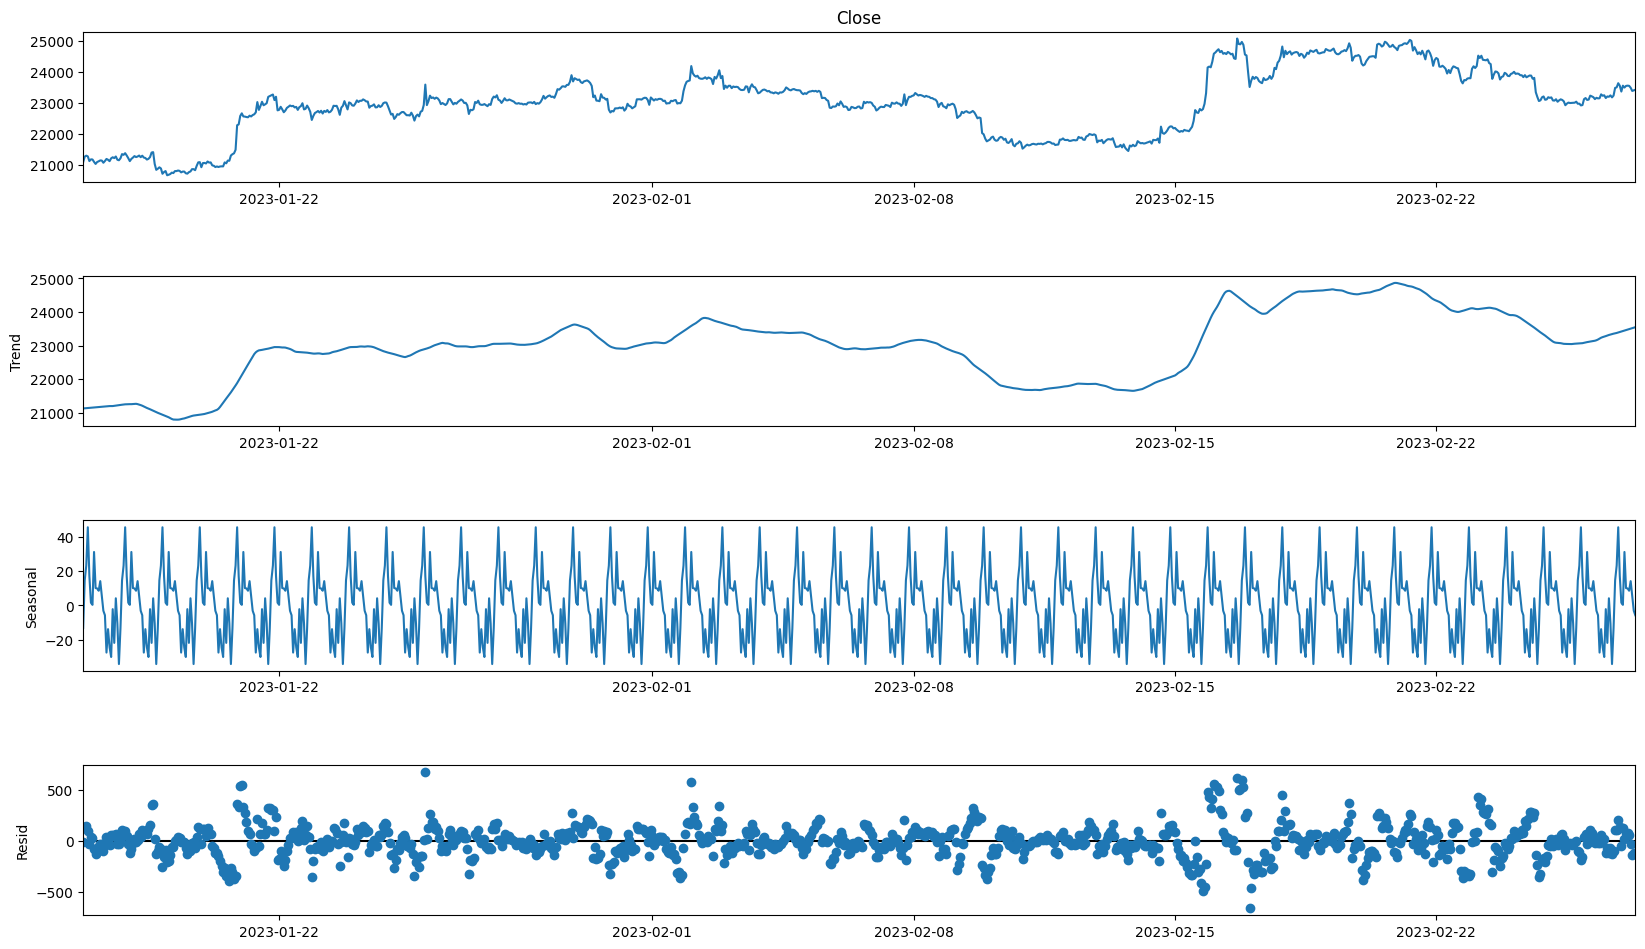

In [9]:
result = seasonal_decompose(df.Close,model='additive',extrapolate_trend='freq')

fig = result.plot()
fig.set_size_inches(18.5, 10.5)